Library berhasil diimport

Cek isi dataset:
Nominal 1000 : 200 gambar
Nominal 10000 : 200 gambar
Nominal 100000 : 200 gambar
Nominal 2000 : 200 gambar
Nominal 20000 : 200 gambar
Nominal 5000 : 200 gambar
Nominal 50000 : 200 gambar


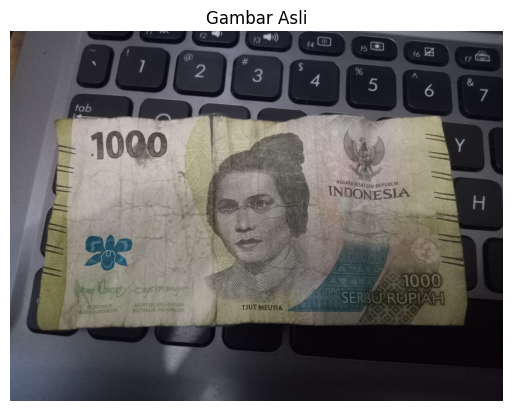

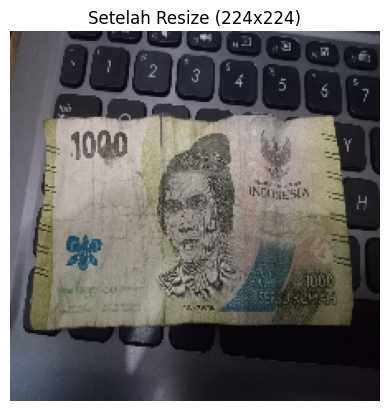

Pixel min: 0.00784313725490196
Pixel max: 0.8274509803921568
ImageDataGenerator siap
Found 1120 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


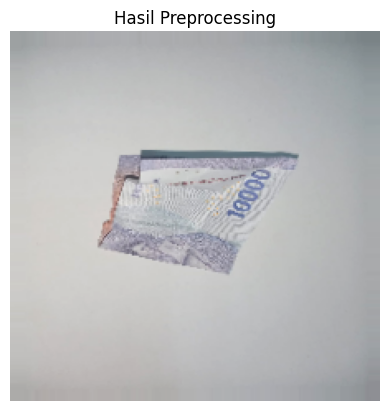

Shape gambar: (224, 224, 3)
Label one-hot: [0. 1. 0. 0. 0. 0. 0.]

Label kelas:
{'1000': 0, '10000': 1, '100000': 2, '2000': 3, '20000': 4, '5000': 5, '50000': 6}

PREPROCESSING SELESAI & SIAP UNTUK CNN

Menyimpan hasil preprocessing...
PENYIMPANAN SELESAI ✅
Dataset hasil preprocessing tersimpan di folder: dataset_preprocessed


In [1]:
# =========================================
# PREPROCESSING DATASET MATA UANG
# Projek Computer Vision - Tuna Netra
# =========================================

# 1. IMPORT LIBRARY
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Library berhasil diimport")

# =========================================
# 2. CEK STRUKTUR DATASET
# =========================================
dataset_path = "dataset"   # pastikan folder dataset ada

print("\nCek isi dataset:")
for folder in os.listdir(dataset_path):
    jumlah = len(os.listdir(os.path.join(dataset_path, folder)))
    print(f"Nominal {folder} : {jumlah} gambar")

# =========================================
# 3. TAMPILKAN 1 GAMBAR ASLI
# =========================================
sample_path = os.path.join(dataset_path, os.listdir(dataset_path)[0])
sample_img = os.listdir(sample_path)[0]

img = cv2.imread(os.path.join(sample_path, sample_img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

# =========================================
# 4. RESIZE GAMBAR
# =========================================
img_resize = cv2.resize(img, (224, 224))

plt.imshow(img_resize)
plt.title("Setelah Resize (224x224)")
plt.axis("off")
plt.show()

# =========================================
# 5. NORMALISASI PIXEL
# =========================================
img_norm = img_resize / 255.0
print("Pixel min:", img_norm.min())
print("Pixel max:", img_norm.max())

# =========================================
# 6. DATA AUGMENTATION + PREPROCESSING
# =========================================
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

print("ImageDataGenerator siap")

# =========================================
# 7. LOAD DATA TRAIN & VALIDATION
# =========================================
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

# =========================================
# 8. CEK HASIL PREPROCESSING
# =========================================
images, labels = next(train_data)

plt.imshow(images[0])
plt.title("Hasil Preprocessing")
plt.axis("off")
plt.show()

print("Shape gambar:", images[0].shape)
print("Label one-hot:", labels[0])

# =========================================
# 9. CEK LABEL KELAS (NOMINAL)
# =========================================
print("\nLabel kelas:")
print(train_data.class_indices)

print("\nPREPROCESSING SELESAI & SIAP UNTUK CNN")
# =========================================
# 10. SIMPAN HASIL PREPROCESSING KE FOLDER BARU
# =========================================

output_path = "dataset_preprocessed"
os.makedirs(output_path, exist_ok=True)

# Buat folder kelas
for class_name in train_data.class_indices.keys():
    os.makedirs(os.path.join(output_path, class_name), exist_ok=True)

print("\nMenyimpan hasil preprocessing...")

# Jumlah gambar yang ingin disimpan per kelas
jumlah_per_kelas = 200
counter = {k: 0 for k in train_data.class_indices.keys()}

# Loop batch data
for images, labels in train_data:
    for i in range(len(images)):
        class_index = np.argmax(labels[i])
        class_name = list(train_data.class_indices.keys())[class_index]

        if counter[class_name] >= jumlah_per_kelas:
            continue

        # Ambil gambar (kembalikan ke 0–255)
        img_save = (images[i] * 255).astype(np.uint8)

        save_name = f"{class_name}_{counter[class_name]}.jpg"
        save_path = os.path.join(output_path, class_name, save_name)

        cv2.imwrite(save_path, cv2.cvtColor(img_save, cv2.COLOR_RGB2BGR))
        counter[class_name] += 1

    # Stop jika semua kelas sudah cukup
    if all(counter[c] >= jumlah_per_kelas for c in counter):
        break

print("PENYIMPANAN SELESAI ✅")
print("Dataset hasil preprocessing tersimpan di folder:", output_path)
